In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

DATADIR = "/home/sasank/Desktop/JTP/DeepLearningSentdex/catsdogs/PetImages"
category = ["Cat","Dog"]

for c in category:
    path = os.path.join(DATADIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap = 'gray')
        plt.show()
        break
    break
        

<Figure size 640x480 with 1 Axes>

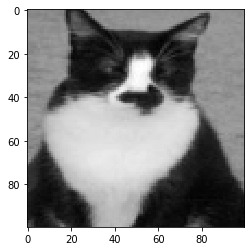

In [2]:
img_size = 100
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [5]:
training_data = []
def create_training():
    for c in category:
        path = os.path.join(DATADIR,c)
        class_num = category.index(c)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            try:
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            

create_training()

In [6]:
print(len(training_data))

24946


In [7]:
import random
random.shuffle(training_data)

In [8]:
for img in training_data[:10]:
    print(img[1])

1
0
1
1
1
0
1
0
0
0


In [9]:
X = []
y = []
for features,labels in training_data:
    X.append(features)
    y.append(labels)
X = np.array(X).reshape(-1,img_size,img_size,1)

In [10]:
import pickle
pkl_out = open('X.pkl','wb')
pickle.dump(X,pkl_out)
pkl_out.close()
pkl_out = open('y.pkl','wb')
pickle.dump(y,pkl_out)
pkl_out.close()

In [11]:
import pickle
pkl_in = open('X.pkl','rb')
X= pickle.load(pkl_in)
pkl_in = open('y.pkl','rb')
y= pickle.load(pkl_in)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Activation,Flatten, MaxPooling2D

X = X/255

model = Sequential()
model.add(Conv2D(64, (3, 3),input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dense(32))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
IMG_SIZE = 50

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

y = np.array(y)
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)


ValueError: Error when checking input: expected conv2d_2_input to have shape (100, 100, 1) but got array with shape (50, 50, 1)